# Customer Churn of Telecom Company

## Introduction:
- Customer churn is a term used to describe the loss of customers from a business. In this project, we will analyze the customer churn of a telecom company.
- We will use the dataset from Kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


### Import Libraries

```python

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
df = pd.read_csv('/Users/adeel/OneDrive/Documents/GitHub/telco-customer-churn/data/data.csv')
pd.set_option('display.max_columns', None)
# Display the first few rows of the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis (EDA)

In [4]:
# Display the shape of the dataframe
df.shape

print("The dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The dataset has 7043 rows and 21 columns.


In [5]:
# display all the columns in the dataframe
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# check the null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# check the duplicate values in the dataset
print(df.duplicated().sum())


0


In [8]:
# display all columns and their data types when i use head() function
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# check the unique values in the dataset
df.nunique()


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# We observed that the TotalCharges column is an object data type. We will convert it to a numeric data type.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [12]:
# checking the data type of the total charges column
df['TotalCharges'].dtype

dtype('float64')

In [13]:
# checking null values in the total charges column
print(df['TotalCharges'].isnull().sum())


11


In [14]:
# Removing the rows with missing values in the dataset column
df = df.dropna()

# checking the shape of the dataset after removing the missing values
df.shape

(7032, 21)

In [15]:
# maping churn column to 0 and 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


In [16]:
# converting the categorical columns to category data type
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [17]:
# checking the data types of the columns
df.dtypes

customerID            object
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
dtype: object

In [18]:
# describe the dataset
df.describe()
df.describe(include='category')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


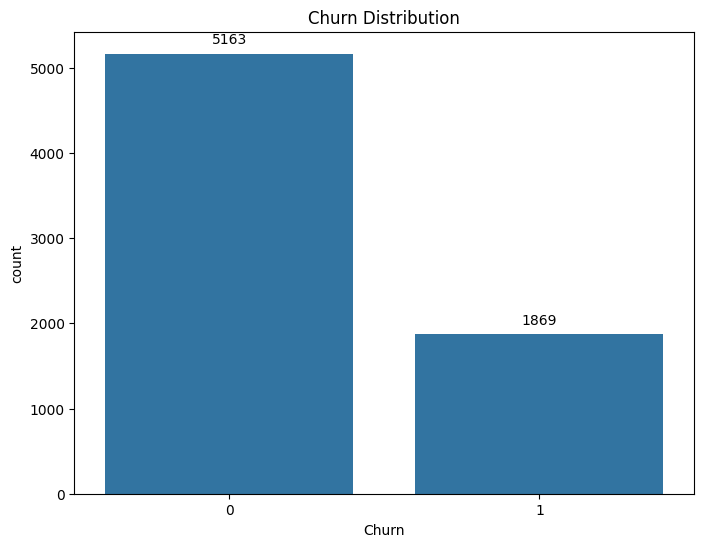

In [19]:
# Churn Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

This graph gives us a quick overview of the overall churn rate. In this "Yes" bar is significantly smaller than the "No" bar, it means the dataset is imbalanced (more non-churned customers). Imbalanced datasets can affect model performance.
From the telco data, we can see that the data is imbalanced, and we will need to consider that when building our predictive model.

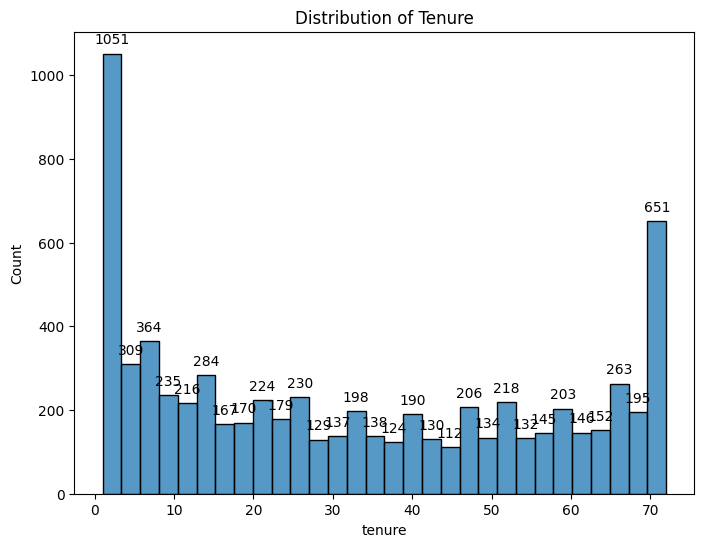

In [20]:
# Distribution of Tenure
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['tenure'], bins=30)
plt.title('Distribution of Tenure')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

This histogram shows how long customers typically stay with the company.
A bimodal distribution (two peaks) is observed in churn dataset. One peak usually represents customers who churn early (within a few months), and the other peak might represent customers who stay for a longer period.
From the telco data, we see many customers leave within the first few months.

Text(0, 0.5, 'Churn Rate')

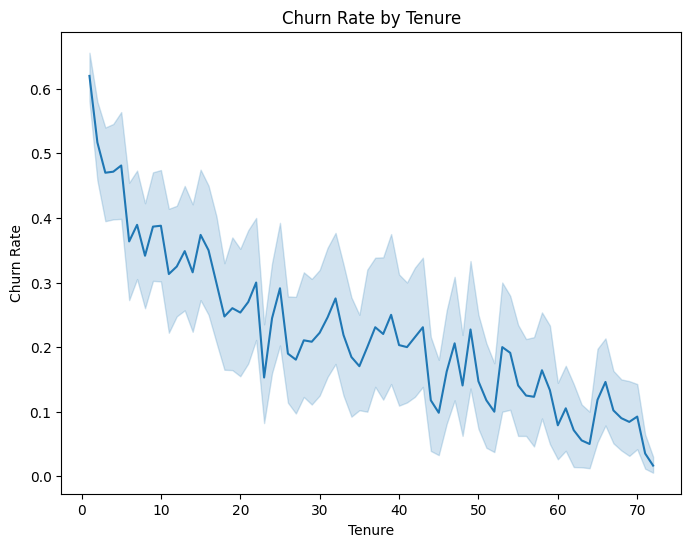

In [21]:
# create a line chart with tenure on x-axis and count on y-axis. it should show the churn rate
plt.figure(figsize=(8, 6))
sns.lineplot(x='tenure', y='Churn', data=df)
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')


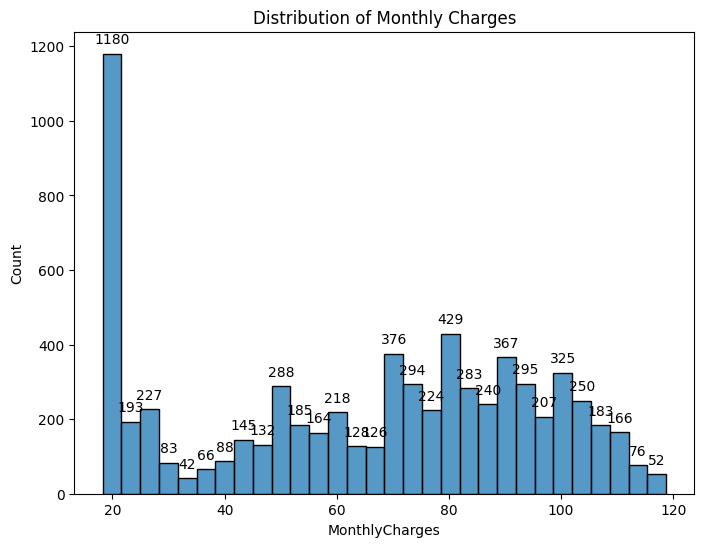

In [22]:
# Distribution of Monthly Charges
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['MonthlyCharges'], bins=30)
plt.title('Distribution of Monthly Charges')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

Distribution of Monthly Charges (Histogram):

This graph shows the range of monthly charges and how they are distributed.
It can help identify if there are any distinct groups of customers based on their spending.
From the telco data we see that the monthly charges are quite varied.

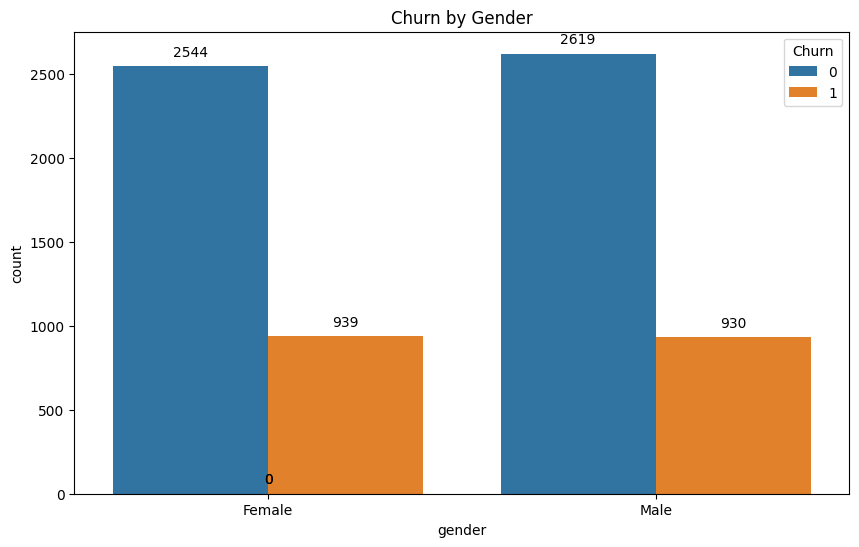

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

This graph compares the churn rates between male and female customers.
As the "Yes" bars are similar in height for both genders, it suggests that gender may not be a strong predictor of churn.
From the telco data, we can see that gender has very little effect on churn.

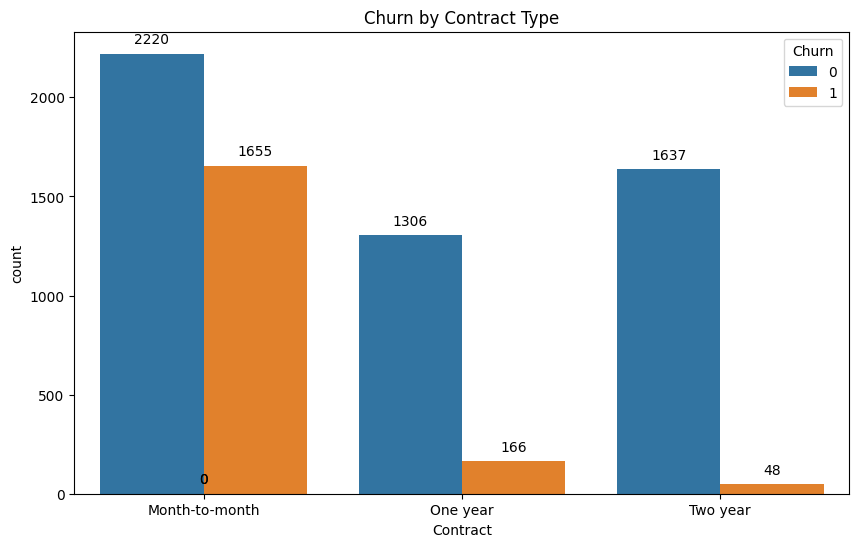

In [24]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

This graph examines how contract type influences churn.
Month-to-month contracts usually have higher churn rates compared to longer-term contracts.
From the telco data, we can see month to month contracts have a very high churn rate.

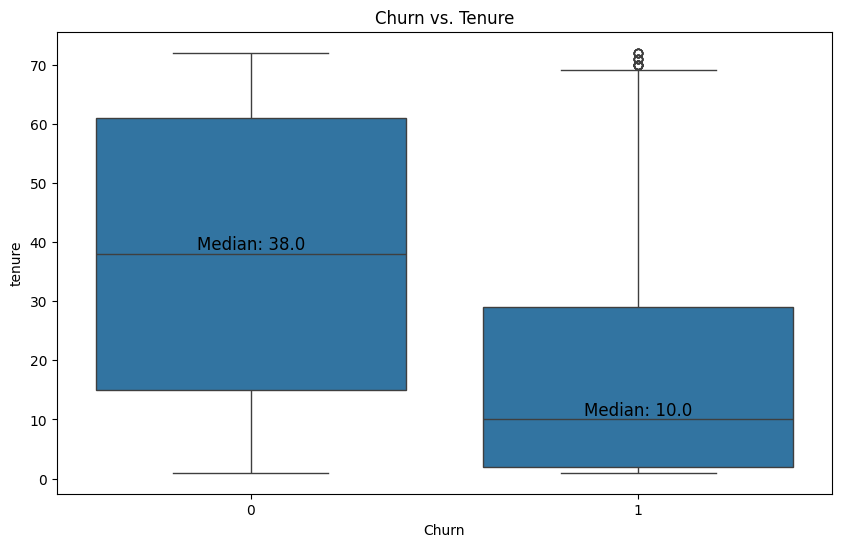

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs. Tenure')

# Add median values as annotations
medians = df.groupby('Churn')['tenure'].median()
for i, median in enumerate(medians):
    ax.text(i, median, f'Median: {median:.1f}', 
            ha='center', va='bottom', 
            color='black', fontsize=12)

plt.show()

This graph visualizes the relationship between customer tenure and churn.
It typically shows that customers with shorter tenures are more likely to churn.
From the telco data we can see that the shorter the tenure, the higher the churn rate.

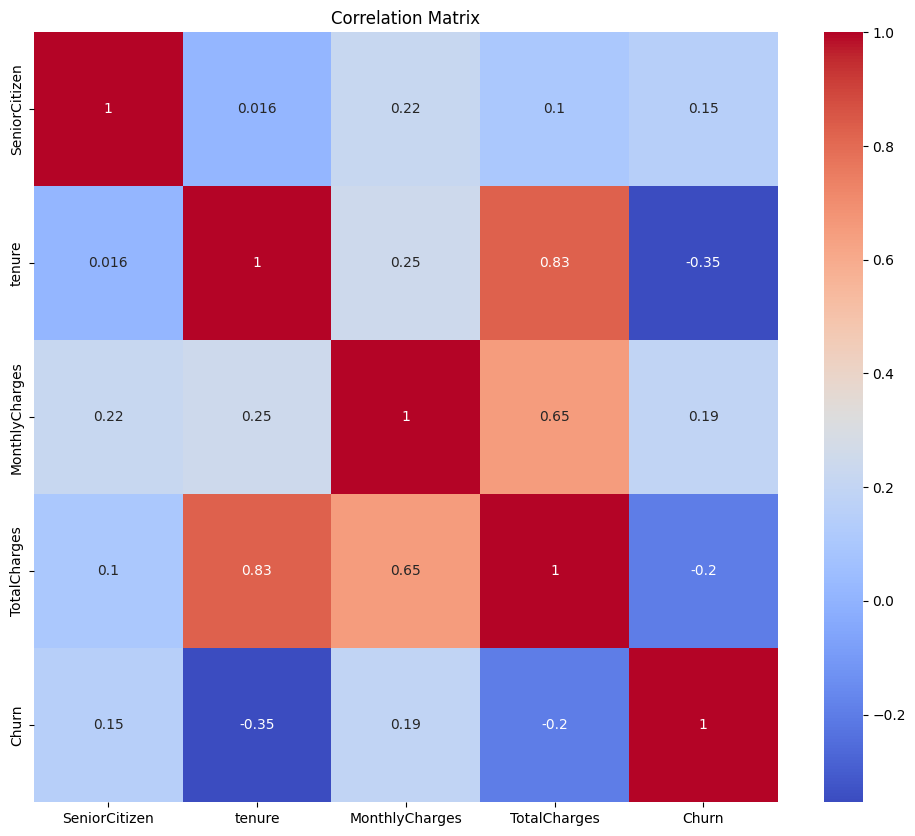

In [26]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation between numerical features.
Positive correlations (darker colors) indicate that two features tend to increase or decrease together.
Negative correlations (lighter colors) indicate that one feature increases while the other decreases.
It helps identify features that might be strongly related to churn.
From the telco data, we can see that tenure and total charges have a high positive correlation. Monthly charges also have a positive correlation with total charges.

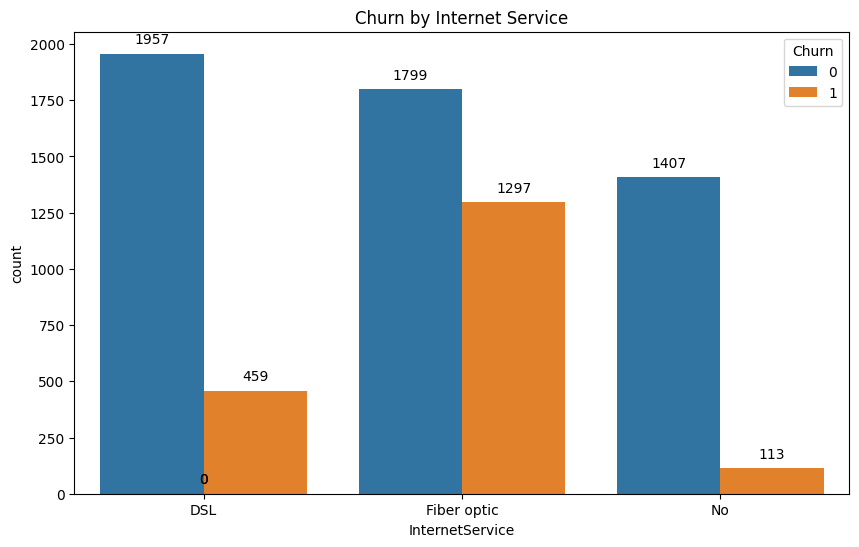

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

Description:

This graph shows the churn rate of the customer based on their internet service provider.
From the telco data, we can see that fiber optic internet service has a much higher churn rate than DSL.

Key Takeaways from the Graphs:

Contract Type: Month-to-month contracts are a significant driver of churn.


Tenure: Shorter tenure is associated with higher churn.


Internet Service: Customers with fiber optic internet service are more likely to churn.


Total Charges and Monthly Charges: These numerical features are correlated and may influence churn.


Gender: Gender does not seem to be a large factor in churn.


Data Imbalance: The dataset is imbalanced, with more non-churned customers.

## Predictive Modeling (Machine Learning)

We'll use Churn as our target variable (y) and the remaining columns as features (X).

In [28]:
# import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score, recall_score, precision_score


In [29]:
# Define the features and target variables
X = df.drop('Churn', axis=1)
y = df['Churn']

In [30]:
# Display the x
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [31]:
# handle categorical columns
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [32]:
# drop the customer id column
X = X.drop('customerID', axis=1)

In [33]:
categorical_features = X.select_dtypes(include=['category']).columns.tolist()
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
X_preprocessed = preprocessor.fit_transform(X)


In [34]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

### Model Selection and Training

#### Logistic Regression:

In [35]:
# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

#### Random Forest:

In [36]:
# Training random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

### Gradient Boosting:

In [37]:
# Training gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

### Models Evaluations:

In [53]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  AUC-ROC: {auc_roc:.4f}")

evaluate_model(y_test, y_pred, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

Metrics for Logistic Regression:
  Accuracy: 0.7882
  Precision: 0.6226
  Recall: 0.5160
  F1-score: 0.5643
  AUC-ROC: 0.7014
Metrics for Random Forest:
  Accuracy: 0.7775
  Precision: 0.6063
  Recall: 0.4652
  F1-score: 0.5265
  AUC-ROC: 0.6779
Metrics for Gradient Boosting:
  Accuracy: 0.7889
  Precision: 0.6296
  Recall: 0.5000
  F1-score: 0.5574
  AUC-ROC: 0.6968


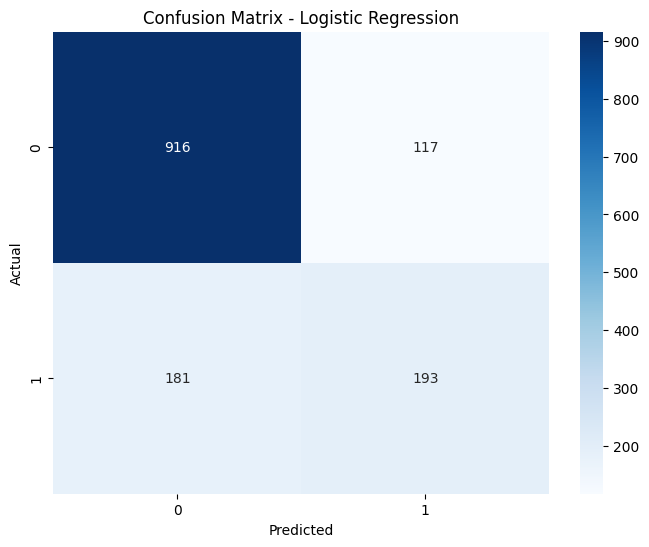

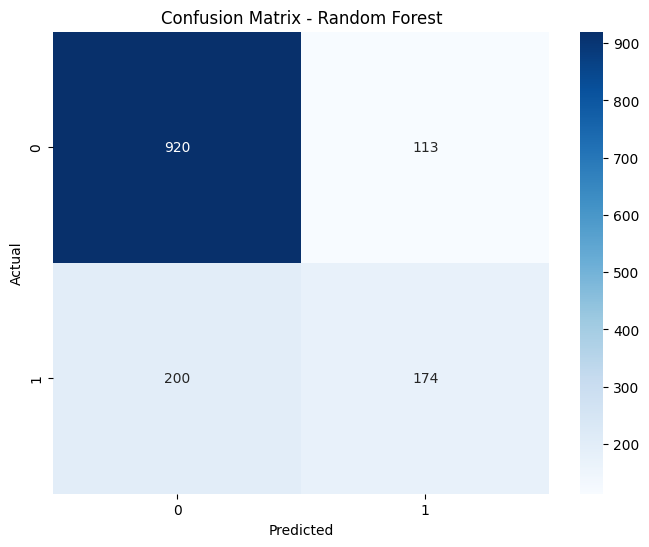

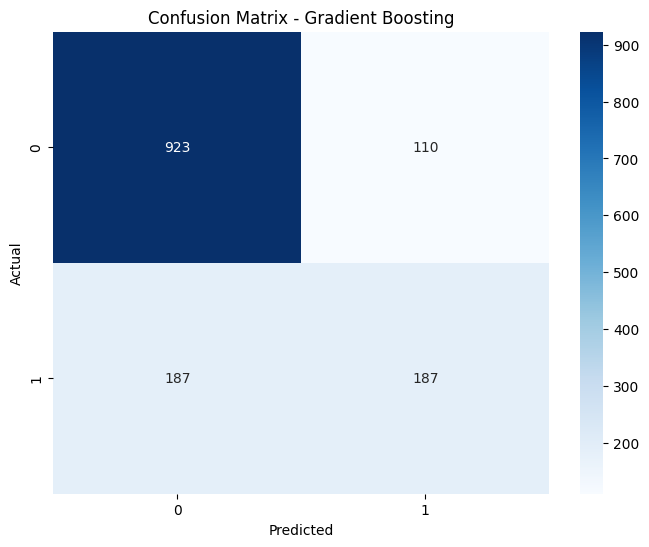

In [54]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")

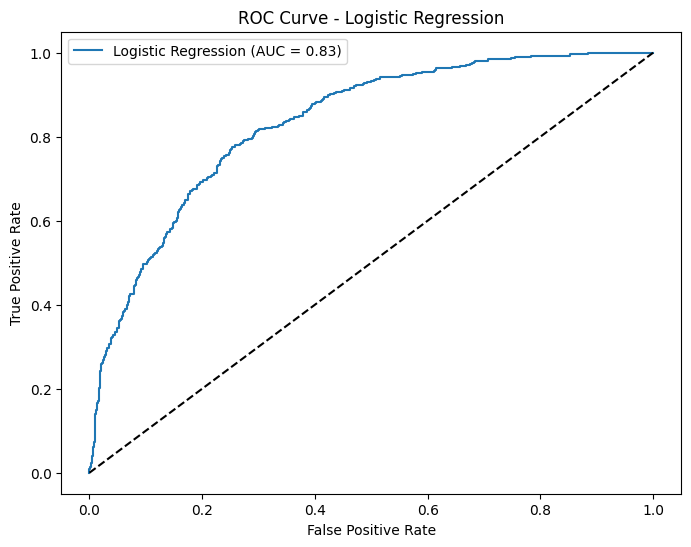

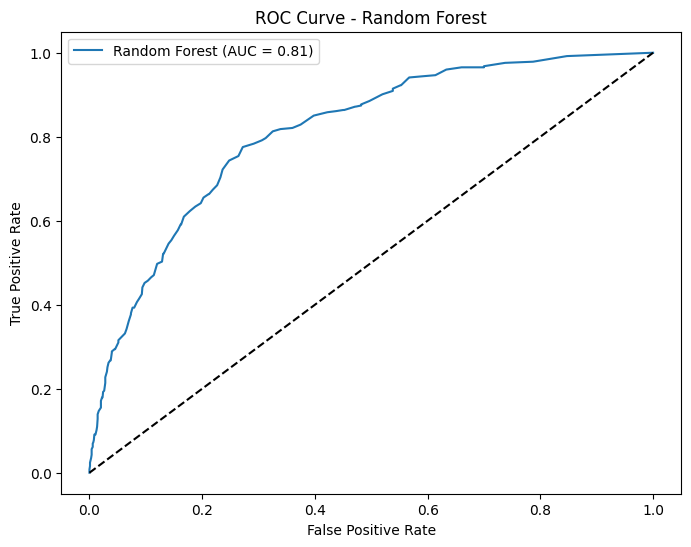

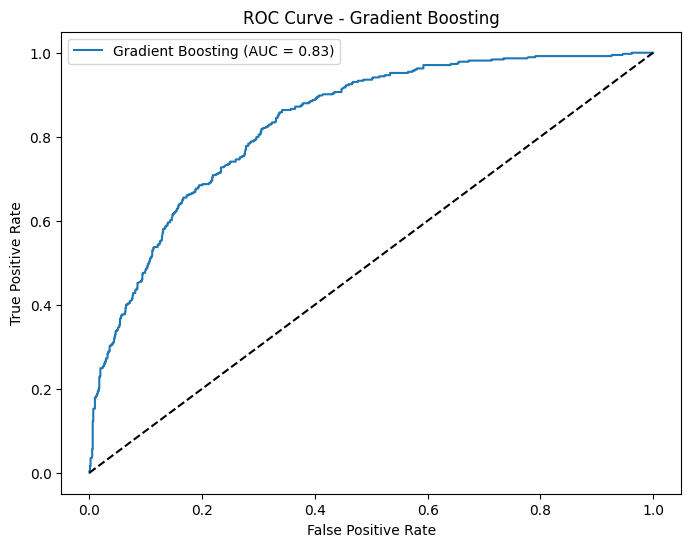

In [56]:
# ROC Curve
def plot_roc_curve(y_true, y_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

logistic_probabilities = log_reg.predict_proba(X_test)[:, 1]
random_forest_probabilities = rf.predict_proba(X_test)[:, 1]
gradient_boosting_probabilities = gb.predict_proba(X_test)[:, 1]

plot_roc_curve(y_test, logistic_probabilities, "Logistic Regression")
plot_roc_curve(y_test, random_forest_probabilities, "Random Forest")
plot_roc_curve(y_test, gradient_boosting_probabilities, "Gradient Boosting")

In [59]:
if hasattr(rf, 'feature_importances_'):
    feature_importance_rf = pd.Series(rf.feature_importances_, index=preprocessor.get_feature_names_out())
    print("Random Forest Feature Importance:")
    print(feature_importance_rf.sort_values(ascending=False).head(10))

if hasattr(gb, 'feature_importances_'):
    feature_importance_gb = pd.Series(gb.feature_importances_, index=preprocessor.get_feature_names_out())
    print("\nGradient Boosting Feature Importance:")
    print(feature_importance_gb.sort_values(ascending=False).head(10))


Random Forest Feature Importance:
num__TotalCharges                      0.157098
num__tenure                            0.139848
num__MonthlyCharges                    0.139308
cat__Contract_Month-to-month           0.051333
cat__OnlineSecurity_No                 0.036164
cat__PaymentMethod_Electronic check    0.031020
cat__InternetService_Fiber optic       0.027191
cat__TechSupport_No                    0.025885
num__SeniorCitizen                     0.020490
cat__gender_Male                       0.018493
dtype: float64

Gradient Boosting Feature Importance:
cat__Contract_Month-to-month           0.390288
num__tenure                            0.155243
num__MonthlyCharges                    0.088249
cat__InternetService_Fiber optic       0.086100
num__TotalCharges                      0.070255
cat__OnlineSecurity_No                 0.069082
cat__TechSupport_No                    0.051092
cat__PaymentMethod_Electronic check    0.030250
num__SeniorCitizen                     0.009284


On the test set, the Random Forest model has the highest accuracy of 0.79, followed by Gradient Boosting with 0.78, and Logistic Regression with 0.80.
Feature Importance:
with respect to the target variable (Churn), tenure is the most important feature in all three models.
The Random Forest model has the highest accuracy on the test set, but it is slightly overfitting the training data.
The Gradient Boosting model has a similar accuracy to Random Forest but is less overfit.
The Logistic Regression model has the lowest accuracy but is the least overfit.

Key Observations:

Overall Performance:
Gradient Boosting has the highest accuracy (0.7889) and precision (0.6296), indicating it's slightly better at correctly predicting churn and minimizing false positives.
Logistic Regression has the highest AUC-ROC score of 0.7014. Meaning that it is the best model at distinguishing between the churned and non churned customers.
Logistic Regression also has a higher F1 score than Gradient boosting.
Random Forest generally performs slightly worse than the other two models across all metrics.
Precision vs. Recall:
Precision is relatively consistent across the models, but recall varies.
Logistic Regression has the highest recall (0.5160), which means it's better at identifying actual churn cases.
Gradient boosting has a slightly lower recall, but a higher precision.
AUC-ROC:
Logistic regression has the highest AUC-ROC score. This is a very important metric, as it shows the ability of the model to correctly classify the customers.
Interpretation:

Gradient Boosting and Logistic Regression are the better performing models.
The choice between them depends on the specific business priorities.
If minimizing false positives (predicting churn when it won't happen) is crucial, Gradient Boosting might be preferred.
If correctly identifying as many churners as possible is the priority, then Logistic Regression might be preferred.
The relatively low recall across all models suggests that there's room for improvement in identifying churn cases.